<a href="https://colab.research.google.com/github/AlwaysEden/Machine-Learning-HW/blob/main/HW7_tSNE_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Mount your drive
from google.colab import drive
drive.mount('/content/drive')

# Code

1.  Apply tSNE to MNIST using any library that you want (not from scratch.)
2.  Plot the result.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import urllib.request
import gzip
import pickle

In [3]:
def load_data(dataset):

    if not os.path.isfile(dataset):
        origin = (
            'http://www.iro.umontreal.ca/~lisa/deep/data/mnist/mnist.pkl.gz'
        )
        print('Downloading data from %s' % origin)
        urllib.request.urlretrieve(origin, dataset)

    print('Loading data...')

    with gzip.open(dataset, 'rb') as f:
        try:
            train_set, valid_set, test_set = pickle.load(f, encoding='latin1')
        except:
            train_set, valid_set, test_set = pickle.load(f)

    all_data_x = np.concatenate([train_set[0], valid_set[0], test_set[0]])
    all_data_y = np.concatenate([train_set[1], valid_set[1], test_set[1]])

    print('... data has been loaded!')
    return all_data_x, all_data_y

In [4]:
data_x, data_y = load_data('mnist.pkl.gz')

Loading data...
... data has been loaded!


In [5]:
from sklearn.manifold import TSNE

In [9]:
result = TSNE(n_components=2, perplexity=30.0, learning_rate='auto',
     random_state=42, max_iter = 1000).fit_transform(data_x)

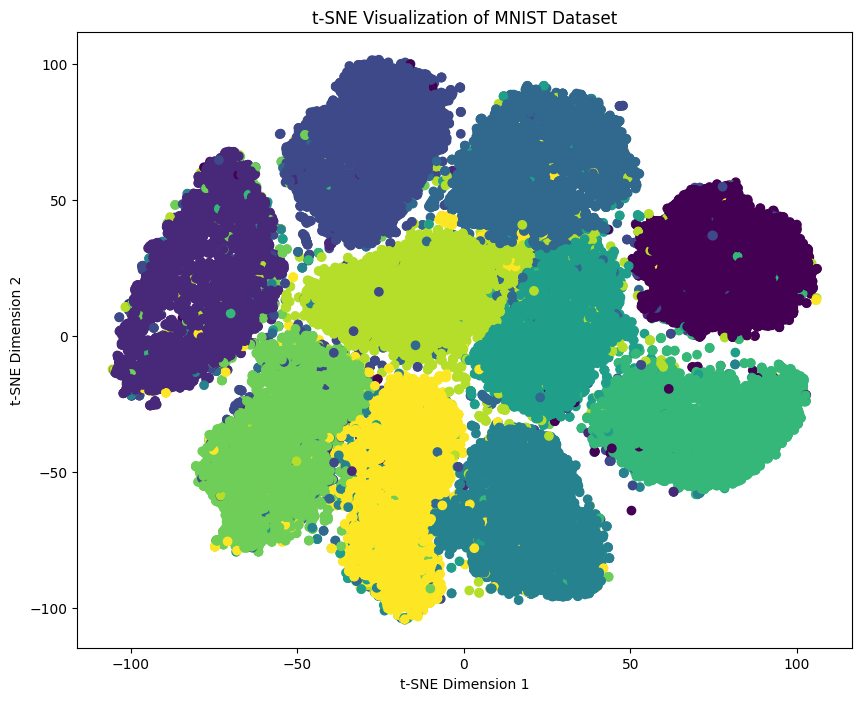

In [12]:
# Plot the results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(result[:, 0], result[:, 1], c=data_y,)
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.title("t-SNE of MNIST Dataset")
plt.show()

# ChatGPT prompts

Now solve the same task with ChatGPT with the following prompts:


1.   Can you provide the code to compute the tSNE for the MNIST dataset?
2.   (If not provided automatically in the previous prompt:) Can you plot the results?


**Paste the answer provided and run the code below:**

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


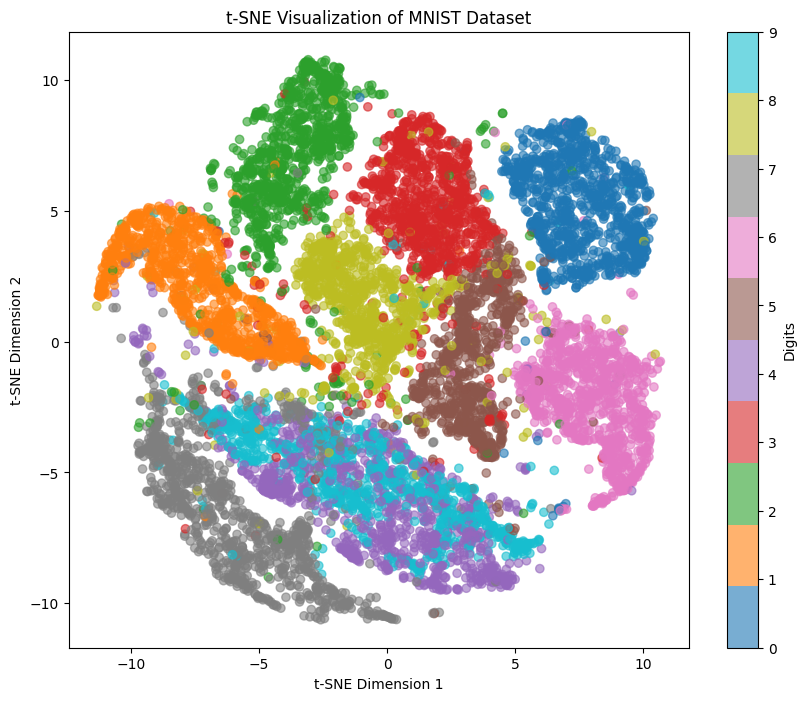

In [22]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from tensorflow.keras.datasets import mnist
import numpy as np

# Load the MNIST dataset
(X_train, y_train), (_, _) = mnist.load_data()

# Flatten the images and select a subset for faster computation
X = X_train[:10000].reshape(10000, -1)
y = y_train[:10000]

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300, )
X_tsne = tsne.fit_transform(X)

# Plot the results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10', alpha=0.6)
plt.colorbar(scatter, ticks=range(10), label="Digits")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.title("t-SNE Visualization of MNIST Dataset")
plt.show()

# Report


1.   What are some differences you notice between your code and ChatGPT's? (Name at least 2)
2.   Ask ChatGPT What are the advantages and disadvantages of using tSNE in a dataset. Paste the answer here. Do you agree with ChatGPT's statement? Why yes or why not?
4.   Conclude with some thoughts and things you learned from this homework.

# Answer
1.
- n_iter option in TSNE(): I found out n_iter is deprecated. But, ChatGPT still use this option.
- loading MNIST: I didn't know the existance of minst library.
- Faster Computing: ChatGPT reduce the number of sample size for faster computation.
2. I agree with ChatGPT's answer.The advanteges and disadvanteges are very clear. Especially, t-SNE has trade-offs in terms of computational demand and interpretability of global structure. Therefore, we need to choose an algorithm based on their own situation.
3. First, I learned that TSNE() function is a making model function and fit_transform() function is dimension reduction function. Second, I learned about hyperparameters.
    
    Hyperparameter
    1. **perplexity**: A parameter that tells how many of the surrounding data points should be treated as neighbors. A higher number means more neighbors, which means more global information, but also less sensitivity to local structure. The opposite is true for smaller numbers.
    2. **early_exaggeration**: A parameter that helps to exaggerate the differences between high-dimensional data to make the initial clusters more obvious in low dimensions. The larger the factor, the wider the gap between the initial clusters and the more distinct they become, but if the factor is too large, KL Divergence may also increase. *Normally not tuned.* 3.
    3. Learning rate: The most critical parameter. It is a parameter that determines how much width is used in the gradient descent method. Therefore, if the value is too small, there is a risk of falling into a bad local minimum, and if the value is too large, there is a risk of increasing KL divergence. The most optimal is said to be (Sample size/Early exaggeration factor), which is implemented in sklearn with `learning_rate ='auto'`.
    4. **max_iter**: You don't need to tune it because it is enough for enough iterations.
    5. **random_state:** It can be seen as setting a random seed for reproducibility.


### ChatGPT's Answer
Using t-SNE (t-Distributed Stochastic Neighbor Embedding) has both advantages and disadvantages, especially when applied to complex datasets like MNIST. Here’s an overview of key pros and cons:

### Advantages of t-SNE
1. **Good for High-Dimensional Data**: t-SNE is excellent for visualizing high-dimensional datasets in 2D or 3D, making it popular for tasks like reducing large datasets (e.g., MNIST images) to dimensions humans can visually interpret.

2. **Captures Local Structure**: t-SNE preserves local relationships, meaning it groups similar data points together well. This is particularly useful for clustering tasks or identifying patterns within subgroups of the data.

3. **Non-Linear Dimensionality Reduction**: Unlike PCA, which is linear, t-SNE can handle more complex, non-linear structures in the data, making it useful for capturing intricate relationships.

4. **Intuitive Visualization**: The resulting visualizations often make it easier to distinguish distinct clusters or classes within the data. This clarity makes it useful for exploratory data analysis or validating model outputs visually.

### Disadvantages of t-SNE
1. **Computationally Expensive**: t-SNE can be slow, especially with large datasets. It’s typically more computationally demanding than other dimensionality reduction methods like PCA, especially as the dataset size and number of dimensions increase.

2. **Parameter Sensitivity**: The results are sensitive to hyperparameters (like perplexity and number of iterations), which can lead to varying results and sometimes requires tuning to get meaningful visualizations. This can be unintuitive and time-consuming.

3. **Poor at Capturing Global Structure**: t-SNE is designed to prioritize local over global relationships. As a result, it may distort the broader structure of the data (e.g., distances between clusters), which can make it challenging if global structure insights are important.

4. **Not Deterministic**: Running t-SNE multiple times on the same data can yield different results due to its random initialization, although setting a fixed random seed can mitigate this.

5. **Limited to Visualization**: t-SNE is mainly useful for visualization purposes. Unlike PCA, it’s less effective as a pre-processing step for downstream tasks, as it doesn’t retain a meaningful projection that can be applied to new data points.

In summary, t-SNE is a powerful tool for visualizing complex, high-dimensional data but has trade-offs in terms of computational demand and interpretability of global structure. It’s generally best used as a visualization tool rather than a step in feature engineering or model training.